Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  

# **Customer Churn Analysis using Classification Algorithms**

1. Import Libraries
2. Check Data
3. EDA
4. Data Preparation
5. Model Building
6. Model Evaluation
  * Logistic Regression (Score, Confusion_Matrix, ROC, AUC)
  * Decision Tree Classifier (ROC, AUC, Tree Plot, Export Text)

**Decision Tree** 

is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.


The decisions or the test are performed on the basis of features of the given dataset.


It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.


In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.


A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

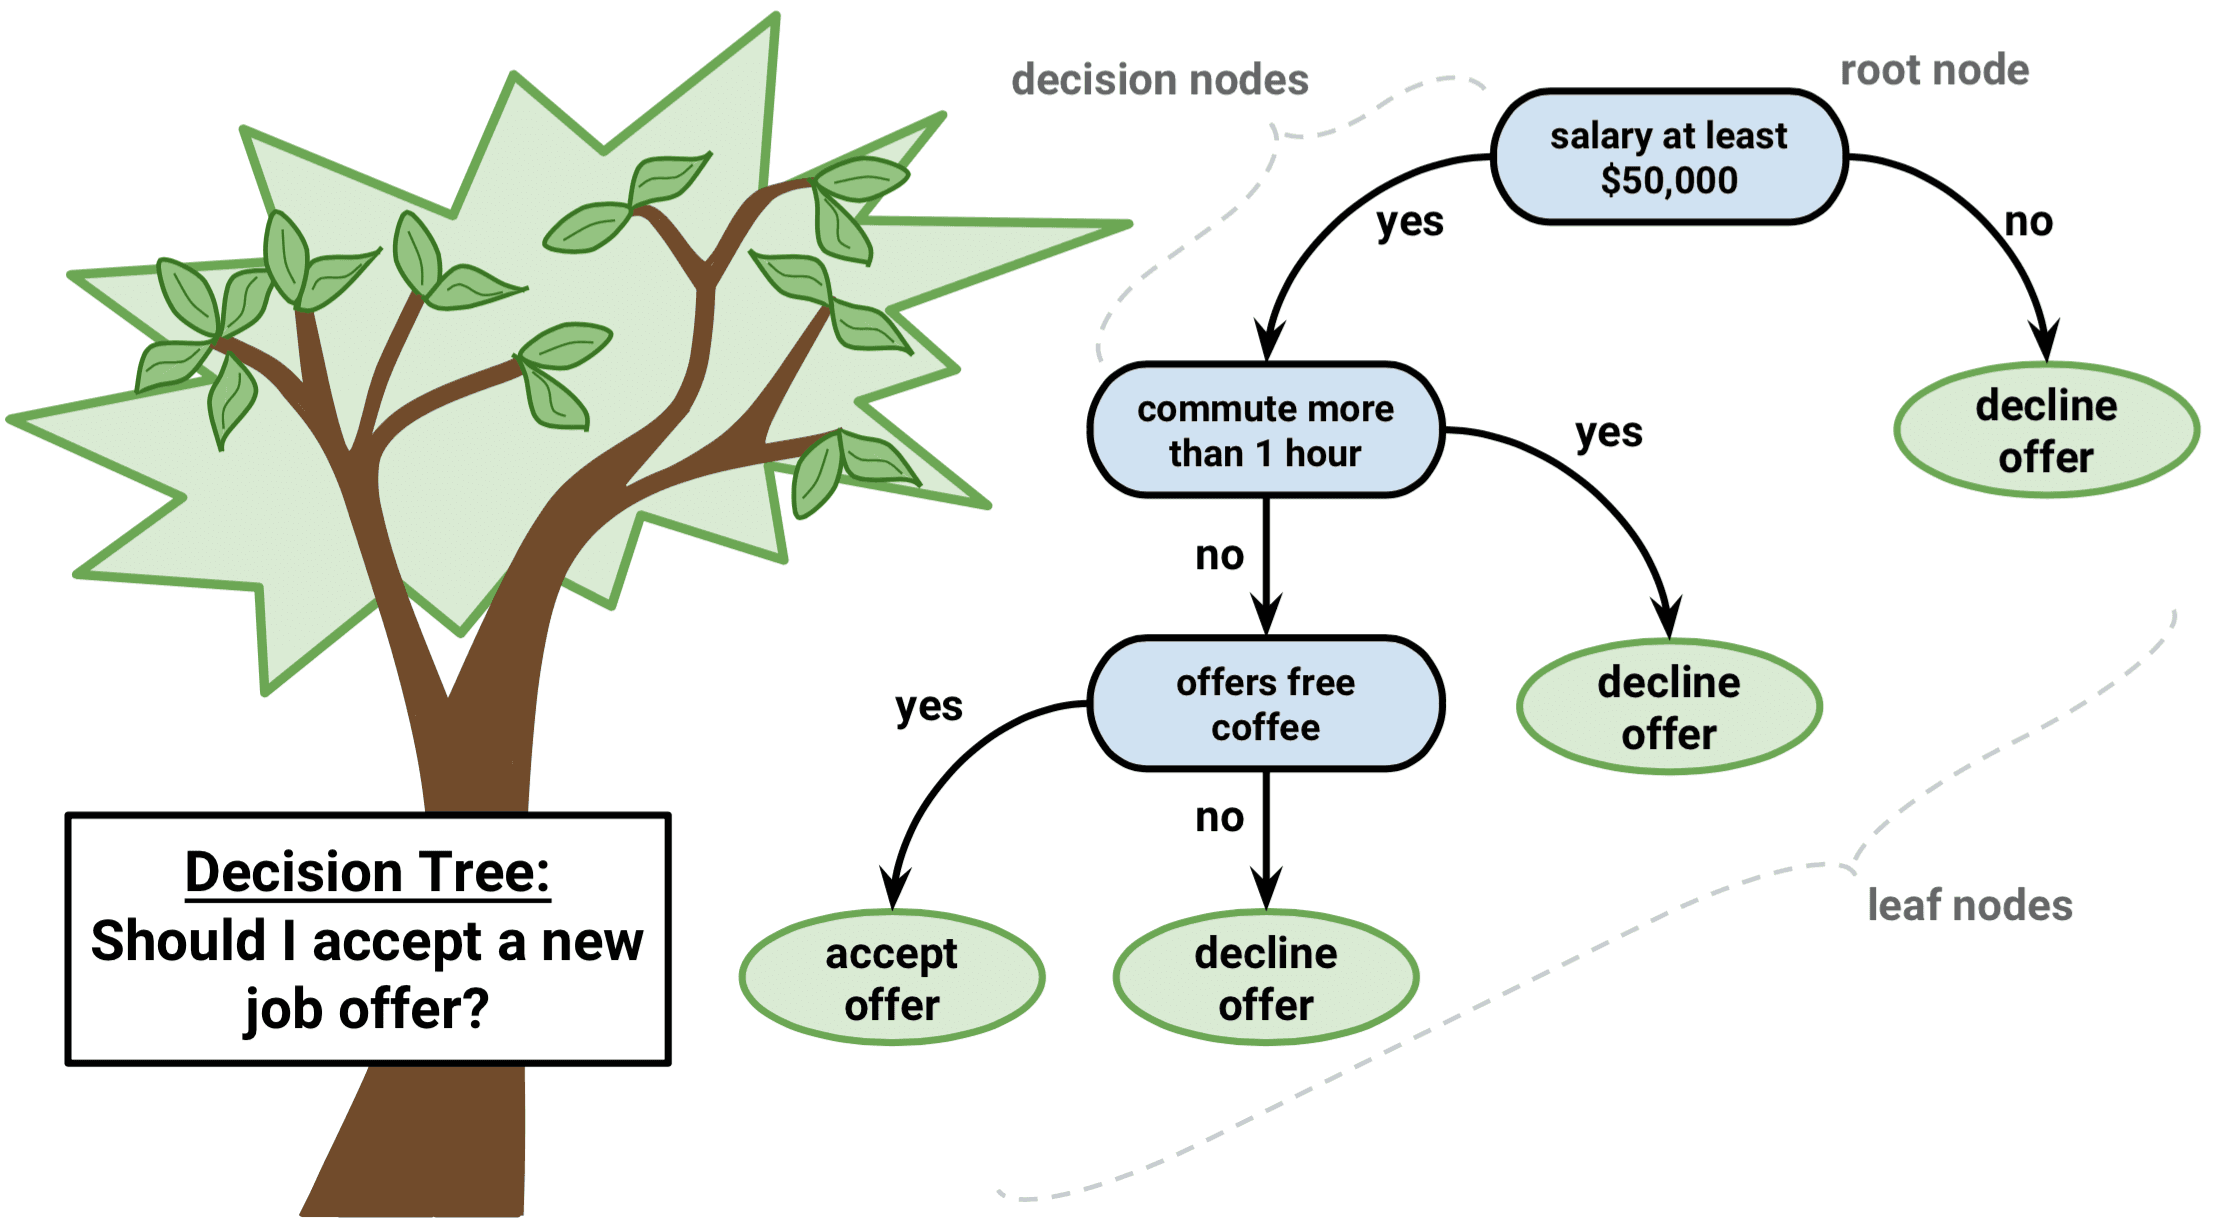

## 1. **Import Libraries**

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

from sklearn.tree import DecisionTreeClassifier

## 2. **Check Data**

In [4]:
churn = pd.read_csv('churn.csv')

In [5]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(churn.shape)

(7043, 21)


In [6]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Note :**

In this data "churn" will be considered as target and remaining columns apart from "customer_id" will be considered as 
features to predict that customer will renew the policy or not. That means it is a supervided classifictaion 
problem and it can be solved by decision tree or any linear based model like logistic regression model...

In [7]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
## convert the object features into numeric features:
churn.TotalCharges = pd.to_numeric(churn.TotalCharges, errors = 'coerce')

Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  

## 3. **EDA**

In [13]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* To handle missing value we can use simple imputer to impute missing values
`by mean. median..`

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

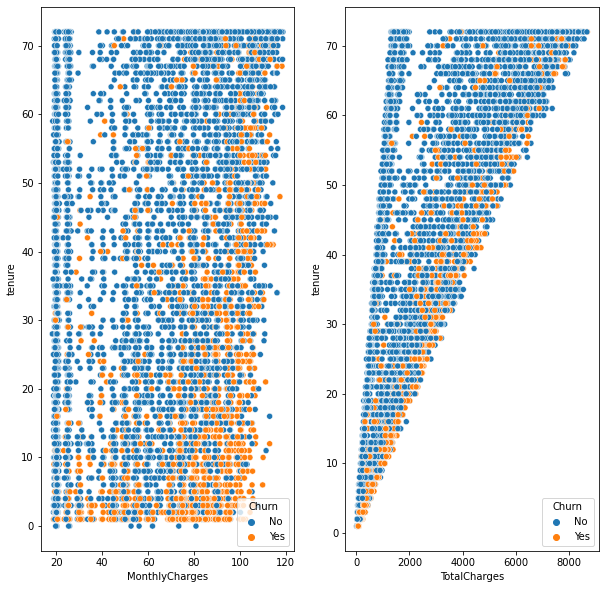

In [23]:
## what other the various inference we can draw :

fig , ax = plt.subplots(1,2,figsize =(10,10))
sns.scatterplot(x = "MonthlyCharges", y ="tenure", hue = "Churn", data = churn, ax = ax[0])
sns.scatterplot(x = "TotalCharges", y ="tenure", hue = "Churn", data = churn, ax = ax[1]);

In [ ]:
## let assume churn no means they will renew:
## churn yes means they will not renew :

In [24]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

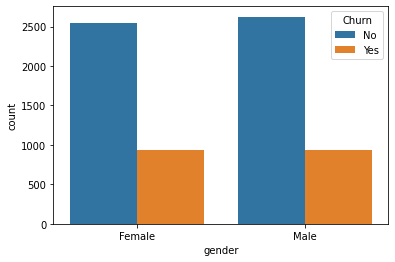

In [25]:
## gender, SeniorCitizen,Partner,Dependents

sns.countplot(x = 'gender',hue = 'Churn',data = churn)

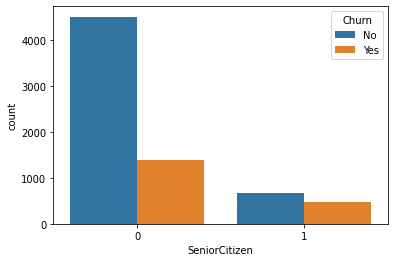

In [26]:
sns.countplot(x = 'SeniorCitizen',hue = 'Churn',data = churn)

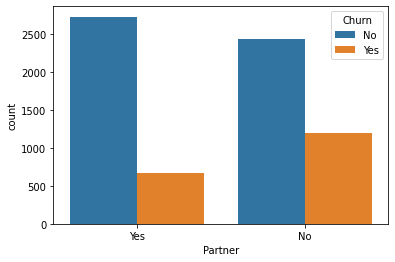

In [27]:
sns.countplot(x = 'Partner',hue = 'Churn',data = churn)

In [28]:
## Next step is to do label encoding on chracter variable:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
## i will divide my whole data into categorical and numeric features:
## then i will do label encoding on categrical features:
## i will concat both the dataset to achieve my main data which i will use for Model building:

num = churn.select_dtypes(include = np.number)
obj = churn.select_dtypes(include = np.object)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

obj2 = obj.apply(le.fit_transform)
obj2.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0


In [33]:
churndf = pd.concat([num,obj2],axis =1)
print(churn.shape)
churndf.head(2)
print(churndf.shape)

(7043, 21)
(7043, 21)


## **4. Model Preparation**

* **Splitting Data**

In [48]:
y = churndf['Churn']
x = churndf.drop(['Churn','customerID','TotalCharges'],axis =1)

In [49]:
x

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,72,103.20,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,11,29.60,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,4,74.40,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [50]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

* **Train Test Split**

In [51]:
#i will buld my model in x_train and y_train and will validate my model via confusion matrix on x_test and y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
print(x_train.shape)
print(x_test.shape)

(5634, 18)
(1409, 18)


## 5. **Model Evaluation**

* **Logistic Regression Model**  

---



In [52]:
from sklearn.linear_model import LogisticRegression
Le = LogisticRegression()

In [53]:
Le.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [57]:
Le.score(x_train, y_train)

0.8035143769968051

In [56]:
predictions = Le.predict(x_test)

In [58]:
Le.score(x_test, y_test)

0.7984386089425124

In [59]:
classification_report(predictions, y_test)

'              precision    recall  f1-score   support\n\n           0       0.89      0.85      0.87      1094\n           1       0.54      0.63      0.58       315\n\n    accuracy                           0.80      1409\n   macro avg       0.72      0.74      0.73      1409\nweighted avg       0.81      0.80      0.80      1409\n'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


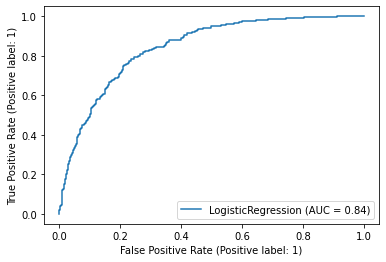

In [60]:
plot_roc_curve(Le, x_test, y_test)

* **Decision Tree Classifier**

---



In [62]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

treemodel = tree.fit(x_train,y_train)
treemodel.score(x_train,y_train)

0.9976925807596734

In [63]:
## validate the model on test dataset:
testmodel =  treemodel.score(x_test,y_test)
print(testmodel)


0.723207948899929


In [65]:
## how to generate confusion matrix on test dataset:

test_predict =treemodel.predict(x_test)
classification_report(y_test,test_predict)

'              precision    recall  f1-score   support\n\n           0       0.82      0.80      0.81      1042\n           1       0.47      0.50      0.48       367\n\n    accuracy                           0.72      1409\n   macro avg       0.65      0.65      0.65      1409\nweighted avg       0.73      0.72      0.73      1409\n'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


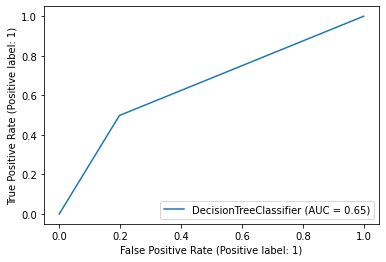

In [66]:
plot_roc_curve(treemodel,x_test,y_test)

In [ ]:
## AUC is 0.67 that means model has not predicted well in my test dataset

In [ ]:
## we will compare this model with logistic regresion:

* **Plotting Tree**

[Text(0.5, 0.875, 'X[15] <= 0.5\ngini = 0.391\nsamples = 5634\nvalue = [4132, 1502]'),
 Text(0.25, 0.625, 'X[2] <= 69.075\ngini = 0.49\nsamples = 3097\nvalue = [1769, 1328]'),
 Text(0.125, 0.375, 'X[1] <= 3.5\ngini = 0.409\nsamples = 1326\nvalue = [946, 380]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[1] <= 13.5\ngini = 0.498\nsamples = 1771\nvalue = [823, 948]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[2] <= 93.675\ngini = 0.128\nsamples = 2537\nvalue = [2363, 174]'),
 Text(0.625, 0.375, 'X[15] <= 1.5\ngini = 0.08\nsamples = 1914\nvalue = [1834, 80]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[1] <= 70.5\ngini = 0.256\nsamples = 623\nvalue = [529, 94]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

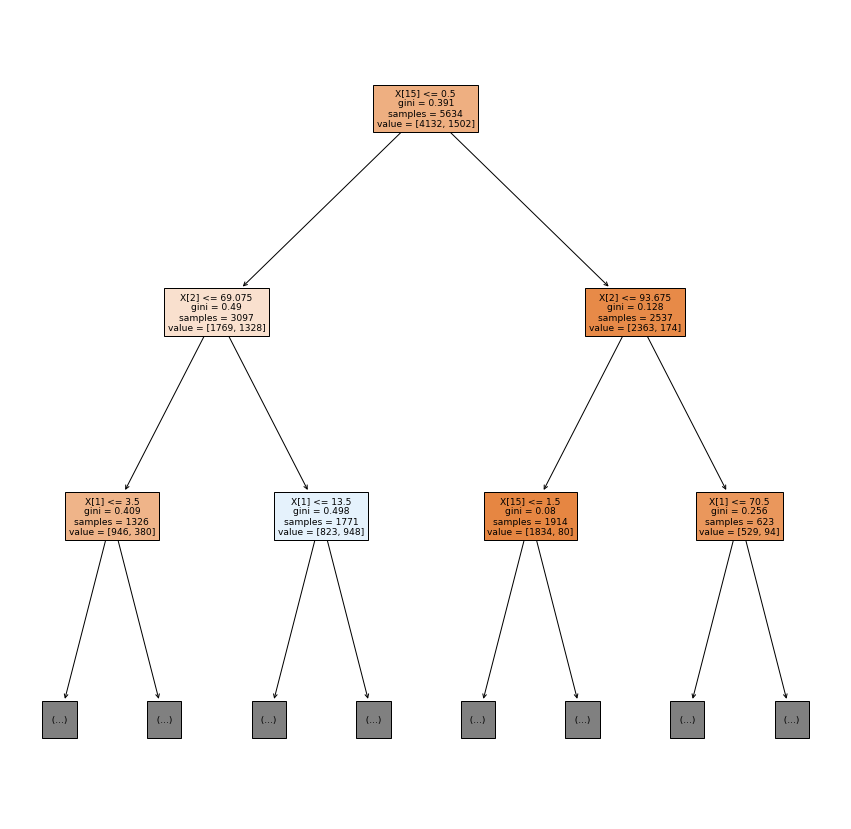

In [73]:
## how to check the tree:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,15))
plot_tree(treemodel,max_depth =2,filled = True)

* **Exporting Tree Code**

In [75]:
from sklearn.tree import export_text
r = export_text(treemodel, feature_names=(list(x_train.columns)))
print(r)

|--- Contract <= 0.50
|   |--- MonthlyCharges <= 69.08
|   |   |--- tenure <= 3.50
|   |   |   |--- OnlineSecurity <= 0.50
|   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |--- PaperlessBilling <= 0.50
|   |   |   |   |   |   |--- MonthlyCharges <= 29.82
|   |   |   |   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |   |   |   |--- PaymentMethod <= 2.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- PaymentMethod >  2.50
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= 24.95
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges >  24.95
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= 27.20
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges >  27.20
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- gender >  0.50
|   |   |   |   |   |   |   |

Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  